# Tweet Emotion Recognition


This project is a part of Coursera course on Natural Language Processing with TensorFlow. I have made some tweaks to the original model to enhance its accuracy and robustness.

In this project, we will work on building a model that can recognize emotions in tweets using TensorFlow. The dataset we will use contains tweets labeled with different emotions. The goal is to preprocess the text data, build a neural network model, and evaluate its performance.

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)




## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [2]:
!pip install nlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.

In [11]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [1]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('dair-ai/emotion')

# Check the dataset
print(dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [4]:
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [6]:
tweets, labels = get_tweets(train)

In [7]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[0]]))

[[2, 139, 3, 679]]


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

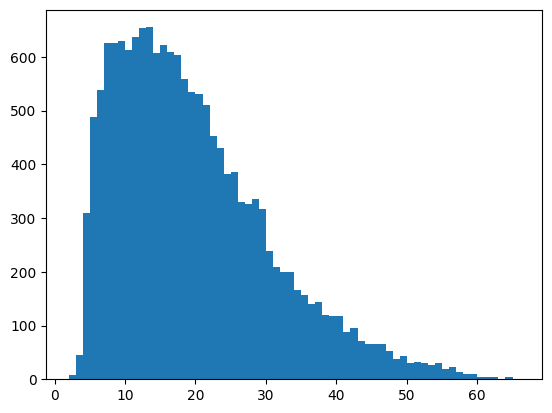

In [12]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [15]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [16]:
padded_train_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [17]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


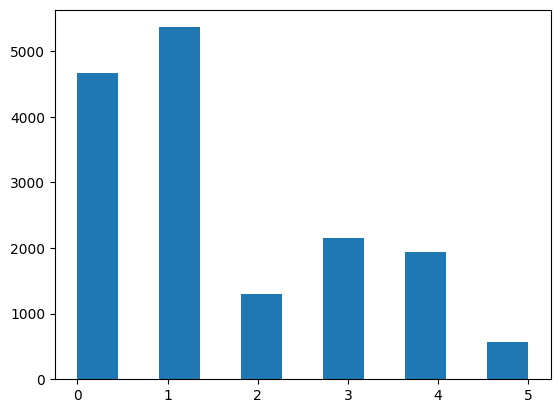

In [18]:
plt.hist(labels, bins=11)
plt.show()

In [19]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [20]:
classes_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [21]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [22]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [23]:
train_labels = names_to_ids(labels)
print(train_labels[0])

0


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_20 (Bidirect  (None, 50, 40)            5920      
 ional)                                                          
                                                                 
 bidirectional_21 (Bidirect  (None, 40)                9760      
 ional)                                                          
                                                                 
 dense_8 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [69]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [46]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [72]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 25s 39ms/step - loss: 1.3448 - accuracy: 0.4788 - val_loss: 0.8576 - val_accuracy: 0.7020
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.5867 - accuracy: 0.7986 - val_loss: 0.5328 - val_accuracy: 0.8315
Epoch 3/20
500/500 [==============================] - 8s 16ms/step - loss: 0.3225 - accuracy: 0.8970 - val_loss: 0.4688 - val_accuracy: 0.8500
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2196 - accuracy: 0.9321 - val_loss: 0.4232 - val_accuracy: 0.8685
Epoch 5/20
500/500 [==============================] - 7s 15ms/step - loss: 0.1640 - accuracy: 0.9488 - val_loss: 0.4466 - val_accuracy: 0.8610
Epoch 6/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1194 - accuracy: 0.9629 - val_loss: 0.4621 - val_accuracy: 0.8705
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0982 - accuracy: 0.9695 - val_loss: 0.4288 - val_accuracy: 0.878

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

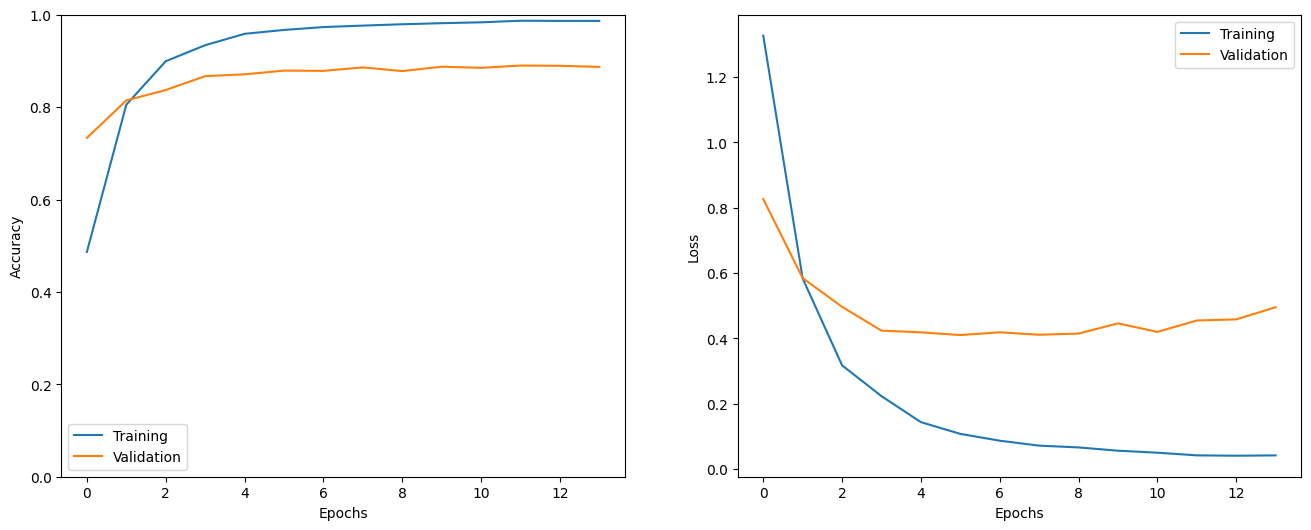

In [28]:
show_history(h)

In [51]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [52]:
_ = model.evaluate(test_sequences, test_labels)

63/63 [==============================] - 1s 12ms/step - loss: 0.3772 - accuracy: 0.8805


In [53]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_tweets[i])
print('Emotion:', index_to_classes[test_labels[i]])

p = model.predict_classes(np.expand_dims(test_sequences[i], axis=0))[0]

print('Predicted Emotion:', index_to_classes.get(p))

Sentence: i write this i feel oddly calm like wanting to just relax in a big chair or lay out in the sun
Emotion: 1


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [56]:
# Predict the probabilities for all test sequences
predictions = model.predict(test_sequences)

# Get the indices of the classes with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Map these indices to their corresponding class names
predicted_emotions = [index_to_classes[pred] for pred in predicted_classes]

#print or process the predicted_emotions as needed
for i, predicted_emotion in enumerate(predicted_emotions):
    print(f'Test Sequence {i}:')
    print('Actual Emotion:', index_to_classes[test_labels[i]])
    print('Predicted Emotion:', predicted_emotion)
    print('---')

Streaming output truncated to the last 5000 lines.
Test Sequence 750:
Actual Emotion: 0
Predicted Emotion: 0
---
Test Sequence 751:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 752:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 753:
Actual Emotion: 0
Predicted Emotion: 0
---
Test Sequence 754:
Actual Emotion: 4
Predicted Emotion: 4
---
Test Sequence 755:
Actual Emotion: 0
Predicted Emotion: 3
---
Test Sequence 756:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 757:
Actual Emotion: 3
Predicted Emotion: 3
---
Test Sequence 758:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 759:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 760:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 761:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 762:
Actual Emotion: 3
Predicted Emotion: 3
---
Test Sequence 763:
Actual Emotion: 1
Predicted Emotion: 1
---
Test Sequence 764:
Actual Emotion: 0
Predicted Emotion: 0
---
Test Sequence 765:


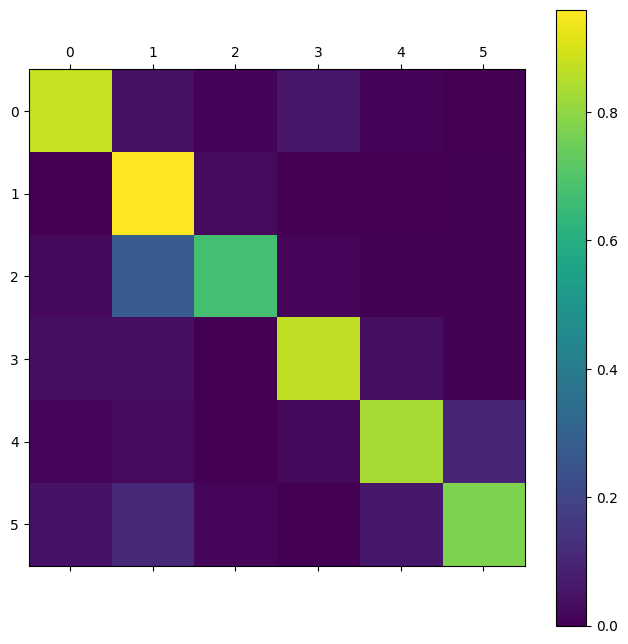

In [58]:
show_confusion_matrix(test_labels, predicted_classes, list(classes))